#Authentication

In [ ]:
import tweepy
from textblob import TextBlob
import pandas as pd
import networkx as nx

In [ ]:
result = tweepy.Cursor(api.user_timeline,id='smth_cr3ativ3',tweet_mode='extended').items(20)

for t in result:
    print(t.full_text)
    print("*******************************************************************")








CONSUMER_KEY = 'QiXvMN2stBAzzoTGqnLrWacnH' 
CONSUMER_SECRET = 'FHiP6ldg2Oitzb0f4lCXSxaWPmrssMKCy6efVGCY8s5ydszAeC' 
OAUTH_TOKEN = '1503338647575306240-kgjrXsUhCyaIRzBTaR1ywMjvjpRXbk' 
OAUTH_TOKEN_SECRET = 'VTIjb5l0QXjjbnVQEajq3fl2UhGB5oG4La4d3Uu5eh7A5' 

### Authorizing an application to access Twitter account data
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

#Assignments

1. Retrieve 10 tweets (not including retweets) based on the topic “artifical intelligence” since 01.01.2020. Create a dataframe and save the following information in the dataframe: date when the tweet is created, username (who created the tweet) and the text of the tweet.


2. Append the dataframe by the polarity of each tweet. Sort the polarity in descending order. Find the user who has the tweet with highest polarity.


3. Create a graph, where the central node should be the user from the previous task and connect his/her followers to the central node and visualize the graph.

In [ ]:
results = tweepy.Cursor(api.search, q = 'artificial+intelligence -filter:retweets', since = '2020-01-01', tweet_mode = 'extended').items(10)
dflist = [[t.created_at, t.user.screen_name, t.full_text, TextBlob(t.full_text).polarity] for t in results]
df = pd.DataFrame(data = dflist, columns = ['Date', 'Username', 'Text', 'Polarity'])
df = df.sort_values(by = 'Polarity', ascending=False)
df

,Date,Username,Text,Polarity
6,2022-05-13 09:35:03,veda_econmuni,💷 Are you a #postdoc interested in AI in Finan...,0.375
9,2022-05-13 09:34:08,JRussellWho,I need to follow a few more suppliers of info ...,0.100
0,2022-05-13 09:38:17,digitalhealthxx,How #China #suppressed #Covid-19 using #artifi...,0.000
8,2022-05-13 09:34:24,Jochanantweets,Europees Parlement maant aan tot haast met reg...,0.000
1,2022-05-13 09:36:51,DigiHealth_2022,Meetings international gladly invites worldwid...,-0.020
3,2022-05-13 09:36:37,ImperialAI,"Pallavi Tiwari presenting ""Artificial Intellig...",-0.300
2,2022-05-13 09:36:39,febrace,Ligia Keiko Carvalho do COTUCA (SP) recebeu um...,-0.600
4,2022-05-13 09:36:11,LangRichardson,The DataHour: Artificial Intelligence in Retai...,-0.600
5,2022-05-13 09:35:28,AndreaInnamora2,Artificial Intelligence for children: a toolki...,-0.600
7,2022-05-13 09:34:44,MarkDeRiz,Using Artificial intelligence to Empower the B...,-0.600


In [ ]:
G = nx.Graph()

In [ ]:
user = api.get_user('veda_econmuni') 

In [ ]:
G.add_node(user.screen_name)

In [ ]:
result = api.followers(user.screen_name)
result

[User(_api=<tweepy.api.API object at 0x7fe33db9fa90>, _json={'id': 22127500, 'id_str': '22127500', 'name': 'Universität Innsbruck', 'screen_name': 'uniinnsbruck', 'location': 'Innsbruck, Austria', 'description': 'Hier twittern @melaniebartos, @shohenwarter, @christianflatz und @marchl_lisa für die Universität Innsbruck, Österreich. https://t.co/0DJKC5J9Ly', 'url': 'https://t.co/GyDveb1Wk7', 'entities': {'url': {'urls': [{'url': 'https://t.co/GyDveb1Wk7', 'expanded_url': 'http://www.uibk.ac.at', 'display_url': 'uibk.ac.at', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/0DJKC5J9Ly', 'expanded_url': 'http://uibk.ac.at/impressum', 'display_url': 'uibk.ac.at/impressum', 'indices': [121, 144]}]}}, 'protected': False, 'followers_count': 12778, 'friends_count': 7178, 'listed_count': 239, 'created_at': 'Fri Feb 27 10:32:57 +0000 2009', 'favourites_count': 4358, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 4740, 'lang': N

In [ ]:
for t in result:
  G.add_edge(t.screen_name, user.screen_name)

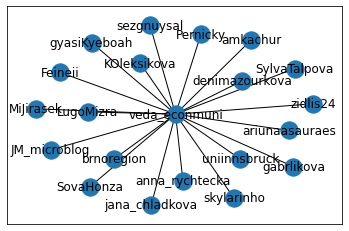

In [ ]:
nx.draw_networkx(G)